In [96]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt




In [97]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, max_epochs=1000):
        """Logistic Regression using Gradient Descent.

        Parameters:
        -----------
        learning_rate: float
            The learning rate for gradient descent.
        max_epochs: int
            The maximum number of epochs.
        """
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """Fit a logistic regression model.

        Parameters:
        -----------
        X: numpy.ndarray
            The input data.
        y: numpy.ndarray
            The target data.
        """
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Gradient descent
        for epoch in range(self.max_epochs):
            # Compute logits
            logits = np.dot(X, self.weights) + self.bias
            # Compute probabilities
            probabilities = 1 / (1 + np.exp(-logits))
            # Compute gradients
            grad_weights = np.dot(X.T, (probabilities - y)) / X.shape[0]
            grad_bias = np.mean(probabilities - y)
            # Update weights and bias
            self.weights -= self.learning_rate * grad_weights
            self.bias -= self.learning_rate * grad_bias

    def predict(self, X):
        """Predict using the logistic regression model.

        Parameters
        ----------
        X: numpy.ndarray
            The input data.
        """
        logits = np.dot(X, self.weights) + self.bias
        probabilities = 1 / (1 + np.exp(-logits))
        return (probabilities > 0.5).astype(int)



In [98]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = (iris.target != 0).astype(int)  # Convert to binary classification problem



In [99]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [100]:
# Variant 1: petal length/width
X_train_variant1 = X_train[:, [2, 3]]
X_test_variant1 = X_test[:, [2, 3]]



In [101]:
# Variant 2: sepal length/width
X_train_variant2 = X_train[:, [0, 1]]
X_test_variant2 = X_test[:, [0, 1]]



In [102]:
# Variant 3: all features
X_train_variant3 = X_train
X_test_variant3 = X_test



In [103]:

# Create and train logistic regression model for variant 1
logistic_regression_variant1 = LogisticRegression()
logistic_regression_variant1.fit(X_train_variant1, y_train)
y_pred_variant1 = logistic_regression_variant1.predict(X_test_variant1)
accuracy_variant1 = np.mean(y_pred_variant1 == y_test)
print("Accuracy Variant 1 (petal length/width):", accuracy_variant1)



Accuracy Variant 1 (petal length/width): 0.8222222222222222


In [104]:
# Create and train logistic regression model for variant 2
logistic_regression_variant2 = LogisticRegression()
logistic_regression_variant2.fit(X_train_variant2, y_train)
y_pred_variant2 = logistic_regression_variant2.predict(X_test_variant2)
accuracy_variant2 = np.mean(y_pred_variant2 == y_test)
print("Accuracy Variant 2 (sepal length/width):", accuracy_variant2)



Accuracy Variant 2 (sepal length/width): 0.8666666666666667


In [105]:
# Create and train logistic regression model for variant 3
logistic_regression_variant3 = LogisticRegression()
logistic_regression_variant3.fit(X_train_variant3, y_train)
y_pred_variant3 = logistic_regression_variant3.predict(X_test_variant3)
accuracy_variant3 = np.mean(y_pred_variant3 == y_test)
print("Accuracy Variant 3 (all features):", accuracy_variant3)




Accuracy Variant 3 (all features): 1.0


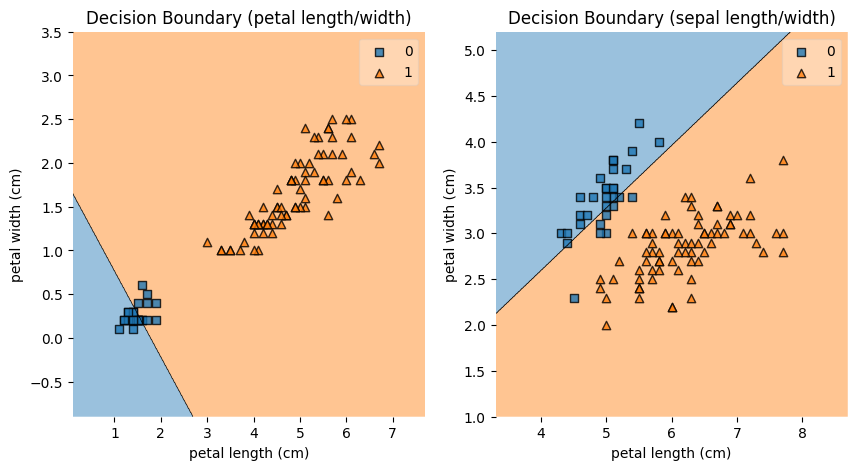

In [95]:
# Visualize decision boundary for petal length/width and sepal length/width
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, (X_train_variant, title) in enumerate([(X_train_variant1, "petal length/width"), (X_train_variant2, "sepal length/width")]):
    logistic_regression = LogisticRegression()
    logistic_regression.fit(X_train_variant, y_train)
    plot_decision_regions(X_train_variant, y_train, clf=logistic_regression, ax=axes[i])
    axes[i].set_xlabel(iris.feature_names[2])
    axes[i].set_ylabel(iris.feature_names[3])
    axes[i].set_title(f"Decision Boundary ({title})")

plt.show()
